In [108]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [109]:
egx = pd.read_csv('egxsentiment.csv')

In [110]:
stock = pd.read_csv('EGX 30 Historical Data.csv')
stockcopy=stock.copy()
stockcopy

,Date,Price,Open,High,Low,Vol.,Change %,change
0,03/26/2024,"29,057.50","31,013.88","29,532.31","28,997.13",211.16M,-0.98%,Negative
1,03/25/2024,"29,344.46","31,013.88","29,344.46","28,946.14",1.19M,0.98%,Positive
2,03/24/2024,"29,060.02","31,013.88","29,377.43","28,777.22",1.75M,0.02%,Positive
3,03/21/2024,"29,054.96","31,013.88","29,094.10","28,280.76",2.80M,1.63%,Positive
4,03/20/2024,"28,589.37","28,675.70","29,229.67","28,542.99",177.70M,-0.30%,Negative
...,...,...,...,...,...,...,...,...
540,01/09/2022,"11,978.56","12,043.42","12,044.78","11,958.61",59.66M,-0.54%,Negative
541,01/05/2022,"12,043.42","11,982.61","12,069.23","11,980.87",144.60M,0.51%,Positive
542,01/04/2022,"11,982.61","11,897.40","11,984.21","11,897.15",114.48M,0.72%,Positive
543,01/03/2022,"11,897.40","11,909.72","11,916.04","11,870.47",79.32M,-0.10%,Negative


In [111]:
egx['Date'] = pd.to_datetime(egx['Date'])
stock['Date'] = pd.to_datetime(stock['Date'])
stock

,Date,Price,Open,High,Low,Vol.,Change %,change
0,2024-03-26,"29,057.50","31,013.88","29,532.31","28,997.13",211.16M,-0.98%,Negative
1,2024-03-25,"29,344.46","31,013.88","29,344.46","28,946.14",1.19M,0.98%,Positive
2,2024-03-24,"29,060.02","31,013.88","29,377.43","28,777.22",1.75M,0.02%,Positive
3,2024-03-21,"29,054.96","31,013.88","29,094.10","28,280.76",2.80M,1.63%,Positive
4,2024-03-20,"28,589.37","28,675.70","29,229.67","28,542.99",177.70M,-0.30%,Negative
...,...,...,...,...,...,...,...,...
540,2022-01-09,"11,978.56","12,043.42","12,044.78","11,958.61",59.66M,-0.54%,Negative
541,2022-01-05,"12,043.42","11,982.61","12,069.23","11,980.87",144.60M,0.51%,Positive
542,2022-01-04,"11,982.61","11,897.40","11,984.21","11,897.15",114.48M,0.72%,Positive
543,2022-01-03,"11,897.40","11,909.72","11,916.04","11,870.47",79.32M,-0.10%,Negative


In [112]:
mergeddf = pd.merge(egx, stock, on='Date', how='left')

In [113]:
 stock['Change %'] = stock['Change %'].str.replace('%', '').astype(float)

In [114]:
stock['Change %'].mean()

0.175651376146789

In [32]:
stock['Change %'].std()

1.582228506681522

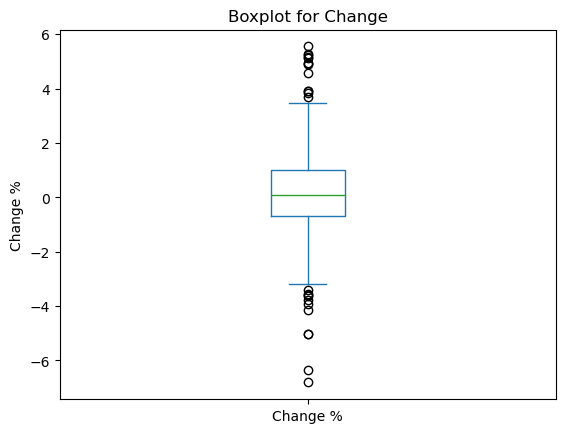

In [38]:
stock['Change %'].plot.box()

# Add title and labels
plt.title("Boxplot for Change")
plt.ylabel("Change %")

# Show the plot
plt.show()

In [115]:
mergeddf['Change %'] = mergeddf['Change %'].str.replace('%', '').astype(float)


In [116]:
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
mergeddf['new sentiment'] = mergeddf['Sentiment'].map(sentiment_map)

In [117]:
mergeddf.fillna("neutral")

,Unnamed: 0,Date,News,Sentiment,Price,Open,High,Low,Vol.,Change %,change,new sentiment
0,0,2024-03-26,Egypt's bourse fluctuates as Sunday and Monday...,negative,"29,057.50","31,013.88","29,532.31","28,997.13",211.16M,-0.98,Negative,-1
1,1,2024-03-06,Egypt's bourse indexes reach record high follo...,positive,"29,743.11","30,668.89","32,217.79","29,743.11",433.39M,-3.02,Negative,1
2,2,2024-02-21,Egyptian Exchange indexes show mixed performan...,negative,"29,292.05","29,330.66","29,497.60","29,150.82",302.29M,-0.13,Negative,-1
3,3,2024-02-11,EGX posts collective losses at close of Sunday...,negative,"28,199.04","28,411.41","28,621.86","27,972.28",267.02M,-0.75,Negative,-1
4,4,2024-02-07,Egyptian Exchange gains over EGP 23 bln on Wed...,positive,"27,905.95","27,270.63","28,281.10","27,270.63",278.98M,2.33,Positive,1
...,...,...,...,...,...,...,...,...,...,...,...,...
216,216,2023-01-29,Egyptian bourse's market capital exceeds EGP 1...,positive,"17,411.46","16,791.11","17,411.46","16,791.11",196.04M,3.69,Positive,1
217,217,2023-01-28,Egypt to announce plan for listing public comp...,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,0
218,218,2023-01-22,"Egyptian bourse gains EGP 3.2 bln, all indexes up",positive,"16,118.85","16,065.98","16,220.38","16,065.98",247.65M,0.33,Positive,1
219,219,2023-01-19,Egyptian bourse indices up,neutral,"16,065.98","15,987.15","16,118.92","15,987.15",252.82M,0.49,Positive,0


In [24]:
mergeddf['new sentiment'].corr(mergeddf['Change %'])

0.4276225764400886

In [124]:
# inv = pd.read_csv('invsent.csv')
# inv

In [95]:
# inv.drop('Unnamed: 0',axis=1, inplace=True)

In [98]:
# inv['Date'] = pd.to_datetime(inv['Date'])
# stockcopy['Date'] = pd.to_datetime(stockcopy['Date'])

In [123]:
# invdf= pd.merge(inv, stockcopy, on='Date', how='right')
# invdf

In [121]:
# stock['Change %'] = stock['Change %'].str.replace('%', '').astype(float)

In [122]:
# invdf['Change %'] = invdf['Change %'].str.replace('%', '').astype(float)
# invdf

In [119]:
# sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
# invdf['new sentiment'] = invdf['sentiment'].map(sentiment_map)
# invdf

In [118]:
# invdf['new sentiment'].corr(invdf['Change %'])